In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

## Cleaning df_final_demo

In [107]:
path3 = "https://raw.githubusercontent.com/gabriela-cl/vanguard-ab-test/main/data/raw/df_final_demo.csv"
df_final_demo = pd.read_csv(path3, sep=';')
pd.set_option('display.max_columns', None)
df_final_demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [108]:
df_final_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70609 non-null  int64  
 1   clnt_tenure_yr    70595 non-null  float64
 2   clnt_tenure_mnth  70595 non-null  float64
 3   clnt_age          70594 non-null  float64
 4   gendr             70595 non-null  object 
 5   num_accts         70595 non-null  float64
 6   bal               70595 non-null  float64
 7   calls_6_mnth      70595 non-null  float64
 8   logons_6_mnth     70595 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.8+ MB


In [109]:
df_final_demo.isnull().any()

client_id           False
clnt_tenure_yr       True
clnt_tenure_mnth     True
clnt_age             True
gendr                True
num_accts            True
bal                  True
calls_6_mnth         True
logons_6_mnth        True
dtype: bool

In [110]:
df_final_demo["gendr"].unique()

array(['U', 'M', 'F', nan, 'X'], dtype=object)

In [111]:
df_final_demo.duplicated().sum()

0

In [112]:
df_final_demo.isnull().sum().sort_values(ascending=False)

clnt_age            15
clnt_tenure_yr      14
clnt_tenure_mnth    14
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
client_id            0
dtype: int64

In [113]:
df_final_demo.columns[df_final_demo.isnull().mean() > 0.8]

Index([], dtype='object')

## Demographics

In [114]:
df_final_demo["clnt_tenure_yr"].describe().round(2)

count    70595.00
mean        12.05
std          6.87
min          2.00
25%          6.00
50%         11.00
75%         16.00
max         62.00
Name: clnt_tenure_yr, dtype: float64

In [115]:
bins = [1, 5, 10, 20, 30, 40, df_final_demo["clnt_tenure_yr"].max()]
labels = ['1 to 5', '6 to 10', '11 to 20', '21 to 30', '31 to 40', '41 or more']
df_final_demo['Clients Ternure (years)'] = pd.cut(df_final_demo["clnt_tenure_yr"], bins=bins, labels = labels, include_lowest=True)

<Axes: xlabel='Clients Ternure (years)'>

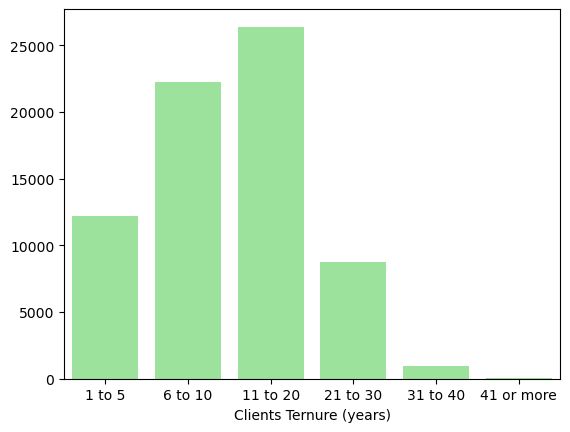

In [116]:
sns.barplot(x =df_final_demo['Clients Ternure (years)'].value_counts().index, y = df_final_demo['Clients Ternure (years)'].value_counts().values, color="lightgreen")

In [117]:
df_final_demo["clnt_age"].describe().round(2)

count    70594.00
mean        46.44
std         15.59
min         13.50
25%         32.50
50%         47.00
75%         59.00
max         96.00
Name: clnt_age, dtype: float64

In [118]:
bins = [10, 20, 40, 60, 80, 100]
labels = ['10 to 20', '21 to 40', '41 to 60', '61 to 80', '81 to 100']
df_final_demo['Clients Age'] = pd.cut(df_final_demo["clnt_age"], bins=bins, labels = labels, include_lowest=True)

<Axes: xlabel='Clients Age'>

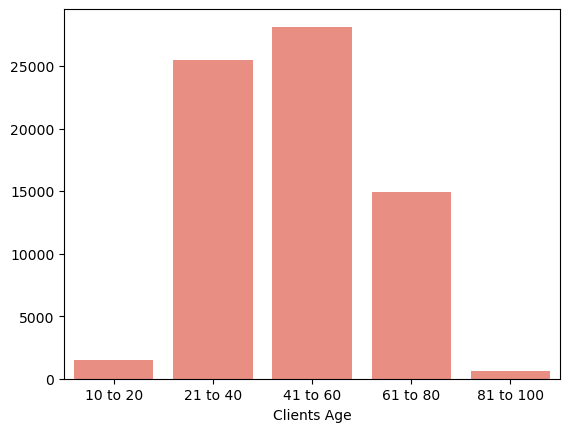

In [119]:
sns.barplot(x =df_final_demo['Clients Age'].value_counts().index, y = df_final_demo['Clients Age'].value_counts().values, color="salmon")

In [120]:
df_final_demo["gendr"].describe()

count     70595
unique        4
top           U
freq      24122
Name: gendr, dtype: object

In [121]:
df_final_demo["gendr"].value_counts()

gendr
U    24122
M    23724
F    22746
X        3
Name: count, dtype: int64

In [122]:
# Filter the DataFrame for 'M' and 'F' genders only
filtered_df = df_final_demo[df_final_demo['gendr'].isin(['M', 'F', 'U'])]

([<matplotlib.axis.XTick at 0x301e61b50>,
 [Text(0, 0, 'Male'), Text(1, 0, 'Female'), Text(2, 0, 'Unknow')])

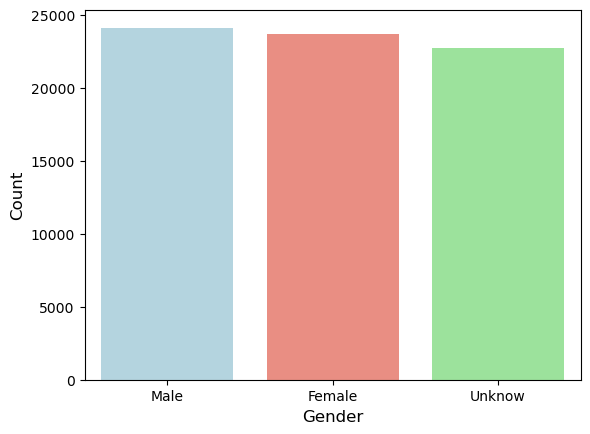

In [123]:
sns.countplot(x='gendr', data=filtered_df, hue = 'gendr', palette=['lightblue', 'salmon', 'lightgreen'])

plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.xticks(ticks=[0, 1, 2], labels=['Male', 'Female', 'Unknow'])

## Data Web

In [124]:
path_1= "https://raw.githubusercontent.com/Mancini997/vanguard-ab-test/main/data/raw/df_final_web_data_pt_1.csv"
df_web_1 = pd.read_csv(path_1,sep=';')
path_2= "https://raw.githubusercontent.com/Mancini997/vanguard-ab-test/main/data/raw/df_final_web_data_pt_2.csv"
df_web_2 = pd.read_csv(path_2,sep=';')

path_3 = "https://raw.githubusercontent.com/Mancini997/vanguard-ab-test/main/data/raw/df_final_demo.csv"

df_final_demo = pd.read_csv(path_3, sep=';')

path_4 ='https://raw.githubusercontent.com/data-bootcamp-v4/lessons/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_experiment_clients.txt'
final_experiment = pd.read_csv(path_4, sep=',')
pd.set_option('display.max_columns', None)

In [125]:
#Merging the Web dataframe in we_df.
web_df =pd.concat([df_web_1, df_web_2], axis=0, join="inner")

In [126]:
web_df

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [127]:
web_df.isna().sum()

client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

In [128]:
web_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 755405 entries, 0 to 412263
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     755405 non-null  int64 
 1   visitor_id    755405 non-null  object
 2   visit_id      755405 non-null  object
 3   process_step  755405 non-null  object
 4   date_time     755405 non-null  object
dtypes: int64(1), object(4)
memory usage: 34.6+ MB


In [129]:
web_df['date_time'] = pd.to_datetime(web_df['date_time'])

In [130]:
web_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 755405 entries, 0 to 412263
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   client_id     755405 non-null  int64         
 1   visitor_id    755405 non-null  object        
 2   visit_id      755405 non-null  object        
 3   process_step  755405 non-null  object        
 4   date_time     755405 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 34.6+ MB


In [131]:
web_df['process_step'].unique()

array(['step_3', 'step_2', 'step_1', 'start', 'confirm'], dtype=object)

In [132]:
# Define the required steps
required_steps = set(['step_3', 'step_2', 'step_1', 'start', 'confirm'])

# Function to check if all steps are present in a visit_id group
def has_all_steps(group):
    steps = set(group['process_step'])
    return steps == required_steps

# Group by visit_id and apply the function
results = web_df.groupby('visit_id').apply(has_all_steps).reset_index()

# Rename columns for clarity
results.columns = ['visit_id', 'contains_all_steps']

print(results)

                            visit_id  contains_all_steps
0       100012776_37918976071_457913               False
1          1000165_4190026492_760066                True
2        100019538_17884295066_43909                True
3       100022086_87870757897_149620                True
4       100030127_47967100085_936361               False
...                              ...                 ...
158090  999986292_55082159911_561557               False
158091  999988789_76411676596_272843               False
158092  999989069_52203656268_170206               False
158093  999991142_15352368745_399725               False
158094  999992932_41666455053_671149                True

[158095 rows x 2 columns]


In [133]:
# Function to calculate the visit duration
def visit_duration(group):
    start_time = group['date_time'].min()
    end_time = group['date_time'].max()
    duration = end_time - start_time
    return duration

# Group by visit_id and calculate the duration
visit_durations = web_df.groupby('visit_id').apply(visit_duration).reset_index()

# Rename columns for clarity
visit_durations.columns = ['visit_id', 'visit_duration']

print(visit_durations)

                            visit_id  visit_duration
0       100012776_37918976071_457913 0 days 00:00:52
1          1000165_4190026492_760066 0 days 00:02:21
2        100019538_17884295066_43909 0 days 00:04:02
3       100022086_87870757897_149620 0 days 00:03:00
4       100030127_47967100085_936361 0 days 00:00:00
...                              ...             ...
158090  999986292_55082159911_561557 0 days 00:31:35
158091  999988789_76411676596_272843 0 days 00:01:58
158092  999989069_52203656268_170206 0 days 00:00:04
158093  999991142_15352368745_399725 0 days 00:00:00
158094  999992932_41666455053_671149 0 days 00:19:31

[158095 rows x 2 columns]


In [134]:
merged_log_visit = pd.merge(df_final_demo[['client_id', 'clnt_tenure_mnth', 'clnt_age', 'logons_6_mnth']], 
                     web_df[['client_id', 'visit_id']], 
                     on='client_id', 
                     how='inner')

In [135]:
merged_log_visit

,client_id,clnt_tenure_mnth,clnt_age,logons_6_mnth,visit_id
0,836976,73.0,60.5,9.0,228976764_46825473280_96584
1,836976,73.0,60.5,9.0,228976764_46825473280_96584
2,836976,73.0,60.5,9.0,228976764_46825473280_96584
3,836976,73.0,60.5,9.0,228976764_46825473280_96584
4,836976,73.0,60.5,9.0,228976764_46825473280_96584
...,...,...,...,...,...
449826,5602139,254.0,59.5,7.0,158544612_4105226940_43043
449827,5602139,254.0,59.5,7.0,158544612_4105226940_43043
449828,5602139,254.0,59.5,7.0,158544612_4105226940_43043
449829,5602139,254.0,59.5,7.0,884309593_49820690623_654151


In [136]:
merged_log_visit.isnull().sum().sort_values(ascending=False)

clnt_age            127
clnt_tenure_mnth    115
logons_6_mnth       115
client_id             0
visit_id              0
dtype: int64

In [137]:
merged_log_visit.duplicated().sum()

352595

In [138]:
log_no_duplicates = merged_log_visit.drop_duplicates()

In [139]:
log_no_duplicates

,client_id,clnt_tenure_mnth,clnt_age,logons_6_mnth,visit_id
0,836976,73.0,60.5,9.0,228976764_46825473280_96584
7,836976,73.0,60.5,9.0,104438405_2368283624_817211
11,2304905,94.0,58.0,9.0,724930510_65323235593_692754
17,1439522,64.0,32.0,9.0,898099666_87299892721_263146
21,1439522,64.0,32.0,9.0,968288276_7230824336_666089
...,...,...,...,...,...
449820,1573142,255.0,68.0,4.0,709721715_35968917131_979675
449821,1573142,255.0,68.0,4.0,326174177_47892407008_51741
449823,1573142,255.0,68.0,4.0,448875043_84914821939_263970
449826,5602139,254.0,59.5,7.0,158544612_4105226940_43043


## Final Experiment

In [140]:
final_experiment

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [141]:
final_experiment.isnull().sum().sort_values(ascending=False)

Variation    20109
client_id        0
dtype: int64

In [142]:
final_experiment_nan = final_experiment.dropna()

In [143]:
final_experiment_nan

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
50495,393005,Control
50496,2908510,Control
50497,7230446,Test
50498,5230357,Test


## Merging

In [144]:
merged_exp_demo = pd.merge(df_final_demo, final_experiment_nan, on='client_id', how='inner')

In [145]:
merged_exp_demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control
...,...,...,...,...,...,...,...,...,...,...
50495,1780858,21.0,262.0,68.5,M,3.0,372100.59,6.0,9.0,Test
50496,6967120,21.0,260.0,68.5,M,3.0,4279873.38,6.0,9.0,Control
50497,5826160,20.0,249.0,56.5,F,2.0,44837.16,2.0,5.0,Test
50498,8739285,19.0,229.0,69.5,F,2.0,44994.24,1.0,4.0,Test


In [146]:

# Create a DataFrame
df = pd.DataFrame(merged_exp_demo)

# Save the DataFrame to a CSV file
#df.to_csv('merged_exp_demo.csv', index=False)

print("Table saved as merged_exp_demo.csv")

Table saved as merged_exp_demo.csv


In [147]:
merged_exp_demo.duplicated().sum()

0

In [148]:
merged_exp_demo.isnull().sum().sort_values(ascending=False)

clnt_age            13
clnt_tenure_yr      12
clnt_tenure_mnth    12
gendr               12
num_accts           12
bal                 12
calls_6_mnth        12
logons_6_mnth       12
client_id            0
Variation            0
dtype: int64

In [149]:
merged_exp_web = pd.merge(web_df, final_experiment_nan, on='client_id', how='inner')

In [150]:
merged_exp_web

,client_id,visitor_id,visit_id,process_step,date_time,Variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test
...,...,...,...,...,...,...
321304,1574008,117364417_77840596075,528720790_71583064618_169151,start,2017-05-06 23:43:27,Test
321305,2908510,814969699_90652851448,562606085_36368381773_92090,start,2017-05-10 22:57:17,Control
321306,2908510,814969699_90652851448,562606085_36368381773_92090,step_2,2017-05-10 22:56:31,Control
321307,2908510,814969699_90652851448,562606085_36368381773_92090,step_1,2017-05-10 22:56:23,Control


In [151]:

# Create a DataFrame
df2 = pd.DataFrame(merged_exp_demo)

# Save the DataFrame to a CSV file
#df2.to_csv('merged_exp_web.csv', index=False)

print("Table saved as merged_exp_web.csv")

Table saved as merged_exp_web.csv


## Number of accounts Control vs Test

In [152]:
# Count unique client_id in each Variation group
unique_clients_per_variation = merged_exp_web.groupby('Variation')['client_id'].nunique().reset_index()

# Rename columns for clarity
unique_clients_per_variation.columns = ['Variation', 'unique_client_count']

print(unique_clients_per_variation)

  Variation  unique_client_count
0   Control                23532
1      Test                26968


## Distribution Control vs Test and Ternure

/var/folders/jc/sd79gch55038ry1m8kx4_s440000gn/T/ipykernel_18460/1492661915.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_distribution = merged_exp_demo.groupby(['Clients Tenure (years)', 'Variation']).size().unstack(fill_value=0)


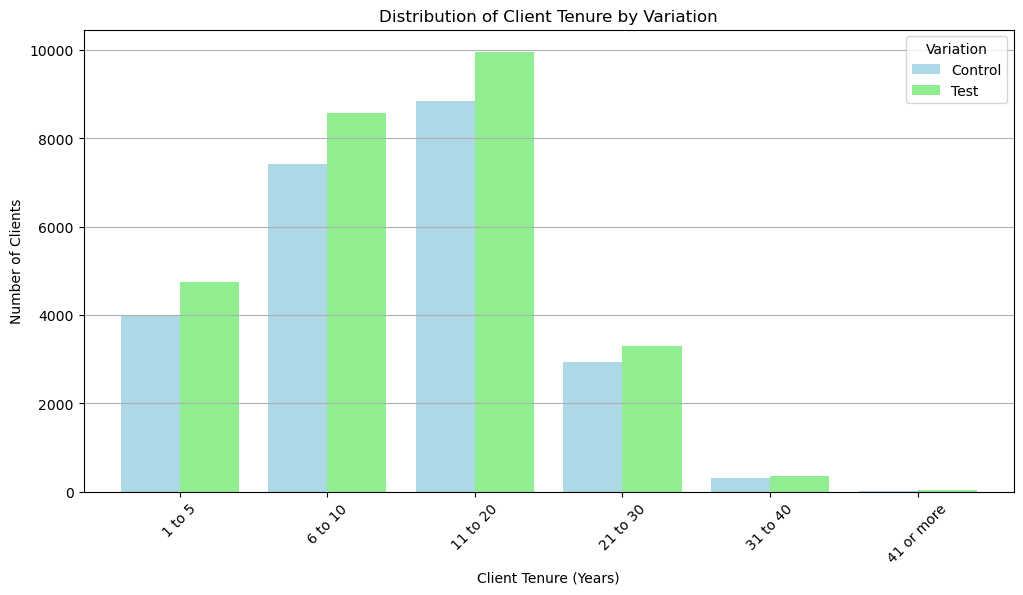

In [153]:
# Define bins and labels for tenure years
bins = [1, 5, 10, 20, 30, 40, merged_exp_demo["clnt_tenure_yr"].max() + 1]  # Added +1 to include the max value
labels = ['1 to 5', '6 to 10', '11 to 20', '21 to 30', '31 to 40', '41 or more']

# Create tenure categories in the DataFrame
merged_exp_demo['Clients Tenure (years)'] = pd.cut(merged_exp_demo["clnt_tenure_yr"], bins=bins, labels=labels, include_lowest=True)

# Count the number of clients in each tenure bin for each variation
tenure_distribution = merged_exp_demo.groupby(['Clients Tenure (years)', 'Variation']).size().unstack(fill_value=0)

# Define colors for each variation
colors = {'Test': 'lightgreen', 'Control': 'lightblue'}

# Plot grouped bar chart with custom colors
ax = tenure_distribution.plot(kind='bar', figsize=(12, 6), width=0.8, color=[colors[col] for col in tenure_distribution.columns])

plt.xlabel('Client Tenure (Years)')
plt.ylabel('Number of Clients')
plt.title('Distribution of Client Tenure by Variation')
plt.legend(title='Variation')
plt.grid(axis='y')

# Adjust x-tick labels for clarity
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=45)

plt.show()

## Table Visit Duration

In [154]:
# Function to calculate the visit duration and return the first variation
def visit_info(group):
    start_time = group['date_time'].min()
    end_time = group['date_time'].max()
    duration = end_time - start_time
    variation = group['Variation'].iloc[0]
    return pd.Series({'visit_duration': duration, 'Variation': variation})

# Group by visit_id and calculate the duration and variation
visit_durations = merged_exp_web.groupby('visit_id').apply(visit_info).reset_index()
visit_durations

,visit_id,visit_duration,Variation
0,100012776_37918976071_457913,0 days 00:00:52,Test
1,100019538_17884295066_43909,0 days 00:04:02,Test
2,100022086_87870757897_149620,0 days 00:03:00,Test
3,100030127_47967100085_936361,0 days 00:00:00,Control
4,100037962_47432393712_705583,0 days 00:02:12,Control
...,...,...,...
69200,999971096_28827267783_236076,0 days 00:02:19,Test
69201,999976049_95772503197_182554,0 days 00:12:08,Test
69202,999984454_18731538378_781808,0 days 00:02:34,Test
69203,999985675_64610694964_443659,0 days 00:17:30,Control


## Completion Rate

In [155]:
pivot_table = pd.pivot_table(
    merged_exp_web,
    index='visit_id',
    columns='process_step',
    aggfunc='size',
    fill_value=0
).reset_index()

ordered_columns = ['start', 'step_1', 'step_2', 'step_3', 'confirm']
pivot_table = pivot_table[['visit_id'] + ordered_columns]

pivot_table

process_step,visit_id,start,step_1,step_2,step_3,confirm
0,100012776_37918976071_457913,0,0,0,0,2
1,100019538_17884295066_43909,3,4,2,1,1
2,100022086_87870757897_149620,1,1,1,1,1
3,100030127_47967100085_936361,1,0,0,0,0
4,100037962_47432393712_705583,3,1,0,0,0
...,...,...,...,...,...,...
69200,999971096_28827267783_236076,1,2,1,1,1
69201,999976049_95772503197_182554,1,1,1,2,1
69202,999984454_18731538378_781808,1,1,1,1,1
69203,999985675_64610694964_443659,1,1,1,1,1


In [156]:
# Count the number of rows where 'confirm' is greater than 0
count_confirm_greater_than_0 = (pivot_table['confirm'] > 0).sum()

# Display the result
print(f"Number of visits that reached 'confirm': {count_confirm_greater_than_0}")

Number of visits that reached 'confirm': 37680


In [157]:
completion_rate_total = (37680/69205) *100
completion_rate_total

54.44693302507044

In [158]:
# Extract the first Variation for each visit_id
variation_map = merged_exp_web.groupby('visit_id')['Variation'].first()

# Add the Variation column to the pivot table
pivot_table['Variation'] = pivot_table['visit_id'].map(variation_map)

pivot_table

process_step,visit_id,start,step_1,step_2,step_3,confirm,Variation
0,100012776_37918976071_457913,0,0,0,0,2,Test
1,100019538_17884295066_43909,3,4,2,1,1,Test
2,100022086_87870757897_149620,1,1,1,1,1,Test
3,100030127_47967100085_936361,1,0,0,0,0,Control
4,100037962_47432393712_705583,3,1,0,0,0,Control
...,...,...,...,...,...,...,...
69200,999971096_28827267783_236076,1,2,1,1,1,Test
69201,999976049_95772503197_182554,1,1,1,2,1,Test
69202,999984454_18731538378_781808,1,1,1,1,1,Test
69203,999985675_64610694964_443659,1,1,1,1,1,Control


In [159]:
# Filter to get only rows where process_step is 'confirm'
confirm_df = merged_exp_web[merged_exp_web['process_step'] == 'confirm']

# Group by Variation to get the number of users who reached 'confirm'
confirm_counts = confirm_df.groupby('Variation')['visit_id'].nunique()

# Group by Variation to get the total number of users
total_counts = merged_exp_web.groupby('Variation')['visit_id'].nunique()

# Calculate the completion rate
completion_rate = (confirm_counts / total_counts).reset_index()
completion_rate.columns = ['Variation', 'Completion_Rate']

# Display the completion rate
completion_rate

,Variation,Completion_Rate
0,Control,0.498493
1,Test,0.585173


In [160]:
merged_exp_web['visit_id'].nunique()

69205

In [170]:
#completion_rate.to_csv('completion_rate.csv', index=False)

## Error Rate

In [161]:
# Sort by visit_id and date_time
merged_exp_web = merged_exp_web.sort_values(by=['visit_id', 'date_time'])

# Map process_step to numerical values
step_mapping = {'start': 1, 'step_1': 2, 'step_2': 3, 'step_3': 4, 'confirm': 5}
merged_exp_web['step_num'] = merged_exp_web['process_step'].map(step_mapping)

# Calculate backward steps
merged_exp_web['prev_step_num'] = merged_exp_web.groupby('visit_id')['step_num'].shift(1)
merged_exp_web['backward_step'] = merged_exp_web['step_num'] < merged_exp_web['prev_step_num']

# Calculate total steps and backward steps for each group
error_stats = merged_exp_web.groupby('Variation').agg(
    total_steps=('step_num', 'count'),
    backward_steps=('backward_step', 'sum')
).reset_index()

# Calculate error rate
error_stats['error_rate'] = error_stats['backward_steps'] / error_stats['total_steps']

# Display the error rate for each group
print(error_stats[['Variation', 'error_rate']])

  Variation  error_rate
0   Control    0.067851
1      Test    0.091961


In [162]:
error_stats

,Variation,total_steps,backward_steps,error_rate
0,Control,143462,9734,0.067851
1,Test,177847,16355,0.091961


In [163]:
#error_stats.to_csv('error_stats.csv', index=False)

In [164]:
merged_exp_web

,client_id,visitor_id,visit_id,process_step,date_time,Variation,step_num,prev_step_num,backward_step
116364,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:22:17,Test,5,NaN,False
116363,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:23:09,Test,5,5.0,False
256806,7338123,612065484_94198474375,100019538_17884295066_43909,start,2017-04-09 16:20:56,Test,1,NaN,False
256805,7338123,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:21:12,Test,2,1.0,False
256804,7338123,612065484_94198474375,100019538_17884295066_43909,step_2,2017-04-09 16:21:21,Test,3,2.0,False
...,...,...,...,...,...,...,...,...,...
104065,6627522,730634087_44272418812,999988789_76411676596_272843,start,2017-04-21 23:49:11,Test,1,NaN,False
104064,6627522,730634087_44272418812,999988789_76411676596_272843,step_1,2017-04-21 23:49:22,Test,2,1.0,False
104063,6627522,730634087_44272418812,999988789_76411676596_272843,step_2,2017-04-21 23:50:16,Test,3,2.0,False
104062,6627522,730634087_44272418812,999988789_76411676596_272843,step_1,2017-04-21 23:51:00,Test,2,3.0,True


In [165]:
# Calculate backward steps
merged_exp_web['prev_step_num'] = merged_exp_web.groupby('visit_id')['step_num'].shift(1)
merged_exp_web['backward_step'] = merged_exp_web['step_num'] < merged_exp_web['prev_step_num']

# Create a pivot table to count backward steps per step for each variation
backward_step_counts = merged_exp_web.groupby(['Variation', 'process_step'])['backward_step'].sum().unstack(fill_value=0)
backward_step_counts

process_step,confirm,start,step_1,step_2,step_3
Variation,,,,,
Control,0,4933,2304,2367,130
Test,0,10621,3417,2288,29


In [97]:
#backward_step_counts.to_csv('backward_step_counts.csv', index=False)

In [166]:
merged_exp_web.head(60)

,client_id,visitor_id,visit_id,process_step,date_time,Variation,step_num,prev_step_num,backward_step
116364,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:22:17,Test,5,NaN,False
116363,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:23:09,Test,5,5.0,False
256806,7338123,612065484_94198474375,100019538_17884295066_43909,start,2017-04-09 16:20:56,Test,1,NaN,False
256805,7338123,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:21:12,Test,2,1.0,False
256804,7338123,612065484_94198474375,100019538_17884295066_43909,step_2,2017-04-09 16:21:21,Test,3,2.0,False
256803,7338123,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:21:35,Test,2,3.0,True
256802,7338123,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:21:41,Test,2,2.0,False
256801,7338123,612065484_94198474375,100019538_17884295066_43909,start,2017-04-09 16:21:45,Test,1,2.0,True
256800,7338123,612065484_94198474375,100019538_17884295066_43909,start,2017-04-09 16:21:59,Test,1,1.0,False
256799,7338123,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:22:04,Test,2,1.0,False


In [167]:
merged_exp_web["backward_step"] = merged_exp_web["backward_step"].astype(int)

In [168]:
merged_exp_web.to_csv('web_with_steps.csv', index=False)

The .shift(1) function is used to align the previous row's value next to the current row's value, enabling comparisons between consecutive rows within each group. This is essential for identifying backward steps in the process.

## Time Spent on Each Step

In [61]:
# Sort by visit_id and date_time
merged_exp_web = merged_exp_web.sort_values(by=['visit_id', 'date_time'])

# Calculate the time difference between consecutive steps
merged_exp_web['time_diff'] = merged_exp_web.groupby('visit_id')['date_time'].diff()

# Remove the first step (as it doesn't have a previous step to compare with)
merged_exp_web = merged_exp_web.dropna(subset=['time_diff'])

# Calculate the average time spent on each step for each variation
average_time_per_step = merged_exp_web.groupby(['Variation', 'process_step'])['time_diff'].mean().reset_index()


In [62]:
merged_exp_web

,client_id,visitor_id,visit_id,process_step,date_time,Variation,step_num,prev_step_num,backward_step,time_diff
116363,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:23:09,Test,5,5.0,False,0 days 00:00:52
256805,7338123,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:21:12,Test,2,1.0,False,0 days 00:00:16
256804,7338123,612065484_94198474375,100019538_17884295066_43909,step_2,2017-04-09 16:21:21,Test,3,2.0,False,0 days 00:00:09
256803,7338123,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:21:35,Test,2,3.0,True,0 days 00:00:14
256802,7338123,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:21:41,Test,2,2.0,False,0 days 00:00:06
...,...,...,...,...,...,...,...,...,...,...
99166,4064969,110735946_42614968419,999985675_64610694964_443659,confirm,2017-04-20 10:02:48,Control,5,4.0,False,0 days 00:14:03
104064,6627522,730634087_44272418812,999988789_76411676596_272843,step_1,2017-04-21 23:49:22,Test,2,1.0,False,0 days 00:00:11
104063,6627522,730634087_44272418812,999988789_76411676596_272843,step_2,2017-04-21 23:50:16,Test,3,2.0,False,0 days 00:00:54
104062,6627522,730634087_44272418812,999988789_76411676596_272843,step_1,2017-04-21 23:51:00,Test,2,3.0,True,0 days 00:00:44


In [63]:
# Pivot table: Rows are process_step, columns are completion status, and values are average time spent
pivot_table_time = average_time_per_step.pivot_table(
    index='process_step',
    columns=['Variation'],
    values=('time_diff'),
    aggfunc='mean'
)

# Convert time_diff to hours, minutes, and seconds
def format_timedelta(td):
    total_seconds = td.total_seconds()
    hours = int(total_seconds // 3600)
    minutes = int((total_seconds % 3600) // 60)
    seconds = int(total_seconds % 60)
    return f"{hours:02}:{minutes:02}:{seconds:02}"

pivot_table_time = pivot_table_time.map(format_timedelta)
pivot_table_time = pivot_table_time.reset_index()

In [64]:
pivot_table_time

Variation,process_step,Control,Test
0,confirm,00:02:08,00:02:08
1,start,00:02:33,00:02:28
2,step_1,00:00:42,00:00:37
3,step_2,00:00:38,00:00:48
4,step_3,00:01:32,00:01:36


In [65]:
average_time_per_step['time_diff'] = average_time_per_step['time_diff'].apply(lambda x: (pd.Timestamp(0) + x).strftime('%H:%M:%S'))
average_time_per_step

,Variation,process_step,time_diff
0,Control,confirm,00:02:08
1,Control,start,00:02:33
2,Control,step_1,00:00:42
3,Control,step_2,00:00:38
4,Control,step_3,00:01:32
5,Test,confirm,00:02:08
6,Test,start,00:02:28
7,Test,step_1,00:00:37
8,Test,step_2,00:00:48
9,Test,step_3,00:01:36


In [67]:
average_time_per_step

,Variation,process_step,time_diff
0,Control,confirm,00:02:08
1,Control,start,00:02:33
2,Control,step_1,00:00:42
3,Control,step_2,00:00:38
4,Control,step_3,00:01:32
5,Test,confirm,00:02:08
6,Test,start,00:02:28
7,Test,step_1,00:00:37
8,Test,step_2,00:00:48
9,Test,step_3,00:01:36


In [76]:
average_time_per_step.dtypes

Variation        object
process_step     object
time_diff        object
total_seconds     int64
dtype: object

In [79]:
# Define the function to convert time string to total seconds
def time_to_seconds(time_str):
    h, m, s = map(int, time_str.split(':'))
    return h * 3600 + m * 60 + s

# Apply the function to the time_diff column to create a new column total_seconds
average_time_per_step['total_seconds'] = average_time_per_step['time_diff'].apply(time_to_seconds)

average_time_per_step

,Variation,process_step,time_diff,total_seconds
0,Control,confirm,00:02:08,128
1,Control,start,00:02:33,153
2,Control,step_1,00:00:42,42
3,Control,step_2,00:00:38,38
4,Control,step_3,00:01:32,92
5,Test,confirm,00:02:08,128
6,Test,start,00:02:28,148
7,Test,step_1,00:00:37,37
8,Test,step_2,00:00:48,48
9,Test,step_3,00:01:36,96


In [80]:
#average_time_per_step.to_csv('time_spent.csv', index=False)

#### Total Time spent on the total process for Control & Test 

Test: 00:09:23

Control: 00:09:42

## Client behavior analysis

From the clients using the online process, how is the demografic distribution?
younger or older, new or long-standing?

In [81]:
#online vs calls
#calls_6_mnth	logons_6_mnth

In [82]:
merged_exp_demo['calls_6_mnth'].describe()

count    50488.000000
mean         3.093289
std          2.187991
min          0.000000
25%          1.000000
50%          3.000000
75%          5.000000
max          6.000000
Name: calls_6_mnth, dtype: float64

In [83]:
merged_exp_demo['logons_6_mnth'].describe()

count    50488.000000
mean         6.131873
std          2.175423
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max          9.000000
Name: logons_6_mnth, dtype: float64

In [84]:
# Filter for clients who made only calls
only_calls = merged_exp_demo[(merged_exp_demo['calls_6_mnth'] > 0) & (merged_exp_demo['logons_6_mnth'] == 0)]

# Filter for clients who made only logons
only_logons = merged_exp_demo[(merged_exp_demo['calls_6_mnth'] == 0) & (merged_exp_demo['logons_6_mnth'] > 0)]

# Filter for clients who made both calls and logons
both_calls_logons = merged_exp_demo[(merged_exp_demo['calls_6_mnth'] > 0) & (merged_exp_demo['logons_6_mnth'] > 0)]

# Count unique clients in each category
count_only_calls = only_calls['client_id'].nunique()
count_only_logons = only_logons['client_id'].nunique()
count_both_calls_logons = both_calls_logons['client_id'].nunique()

# Print the results
print(f"Number of clients making only calls: {count_only_calls}")
print(f"Number of clients making only logons: {count_only_logons}")
print(f"Number of clients making both calls and logons: {count_both_calls_logons}")

Number of clients making only calls: 0
Number of clients making only logons: 7732
Number of clients making both calls and logons: 42756


In [85]:
calls = merged_exp_demo[(merged_exp_demo['calls_6_mnth'] > 0)]
calls

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,Clients Tenure (years)
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,6 to 10
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control,6 to 10
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test,1 to 5
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test,11 to 20
6,272934,5.0,66.0,58.5,U,2.0,27021.42,2.0,5.0,Control,1 to 5
...,...,...,...,...,...,...,...,...,...,...,...
50494,4079649,23.0,276.0,62.5,M,3.0,57575.28,4.0,7.0,Control,21 to 30
50495,1780858,21.0,262.0,68.5,M,3.0,372100.59,6.0,9.0,Test,21 to 30
50496,6967120,21.0,260.0,68.5,M,3.0,4279873.38,6.0,9.0,Control,21 to 30
50497,5826160,20.0,249.0,56.5,F,2.0,44837.16,2.0,5.0,Test,11 to 20


## Tenure distribution for the people only using the website (no calls)

/var/folders/jc/sd79gch55038ry1m8kx4_s440000gn/T/ipykernel_18460/1450897390.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_logons['Clients Tenure (years)'] = pd.cut(only_logons["clnt_tenure_yr"], bins=bins, labels=labels, include_lowest=True)
/var/folders/jc/sd79gch55038ry1m8kx4_s440000gn/T/ipykernel_18460/1450897390.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_distribution = only_logons.groupby(['Clients Tenure (years)', 'Variation']).size().unstack(fill_value=0)


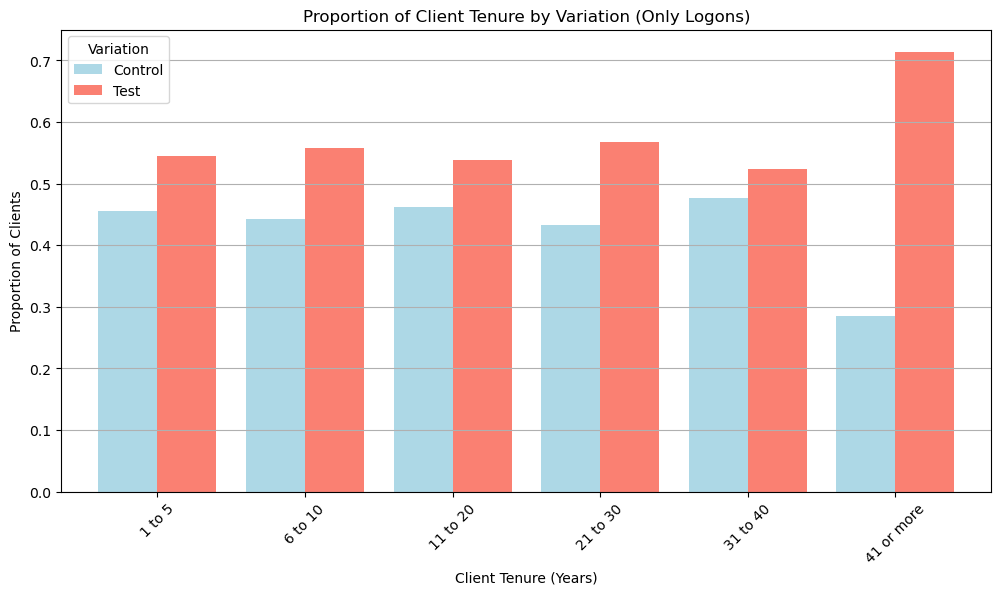

In [86]:
# Filter for clients who made only logons
only_logons = merged_exp_demo[(merged_exp_demo['calls_6_mnth'] == 0) & (merged_exp_demo['logons_6_mnth'] > 0)]

# Define bins and labels for tenure years
bins = [1, 5, 10, 20, 30, 40, merged_exp_demo["clnt_tenure_yr"].max() + 1]  # Added +1 to include the max value
labels = ['1 to 5', '6 to 10', '11 to 20', '21 to 30', '31 to 40', '41 or more']

# Create tenure categories in the DataFrame
only_logons['Clients Tenure (years)'] = pd.cut(only_logons["clnt_tenure_yr"], bins=bins, labels=labels, include_lowest=True)

# Count the number of clients in each tenure bin for each variation
tenure_distribution = only_logons.groupby(['Clients Tenure (years)', 'Variation']).size().unstack(fill_value=0)

# Calculate proportions
tenure_distribution_proportion = tenure_distribution.div(tenure_distribution.sum(axis=1), axis=0)

# Define colors for each variation
colors = {'Test': 'salmon', 'Control': 'lightblue'}

# Plot grouped bar chart with custom colors
ax = tenure_distribution_proportion.plot(kind='bar', figsize=(12, 6), width=0.8, color=[colors[col] for col in tenure_distribution_proportion.columns])

plt.xlabel('Client Tenure (Years)')
plt.ylabel('Proportion of Clients')
plt.title('Proportion of Client Tenure by Variation (Only Logons)')
plt.legend(title='Variation')
plt.grid(axis='y')

# Adjust x-tick labels for clarity
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=45)

plt.show()

/var/folders/jc/sd79gch55038ry1m8kx4_s440000gn/T/ipykernel_18460/372764159.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_logons['Clients Tenure (years)'] = pd.cut(only_logons["clnt_tenure_yr"], bins=bins, labels=labels, include_lowest=True)
/var/folders/jc/sd79gch55038ry1m8kx4_s440000gn/T/ipykernel_18460/372764159.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_distribution = only_logons.groupby(['Clients Tenure (years)', 'Variation']).size().unstack(fill_value=0)


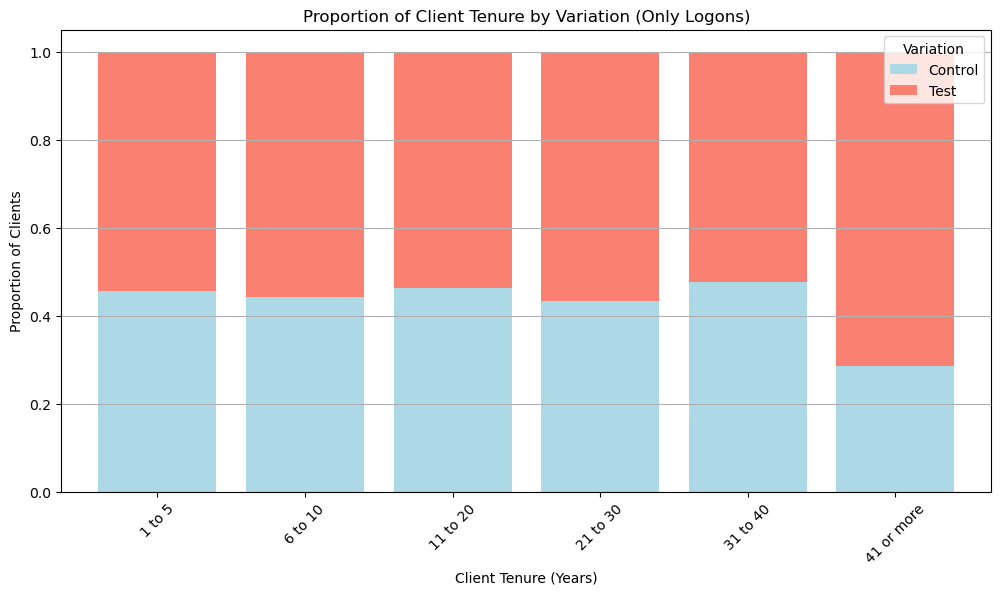

In [87]:
# Filter for clients who made only logons
only_logons = merged_exp_demo[(merged_exp_demo['calls_6_mnth'] == 0) & (merged_exp_demo['logons_6_mnth'] > 0)]

# Define bins and labels for tenure years
bins = [1, 5, 10, 20, 30, 40, merged_exp_demo["clnt_tenure_yr"].max() + 1]  # Added +1 to include the max value
labels = ['1 to 5', '6 to 10', '11 to 20', '21 to 30', '31 to 40', '41 or more']

# Create tenure categories in the DataFrame
only_logons['Clients Tenure (years)'] = pd.cut(only_logons["clnt_tenure_yr"], bins=bins, labels=labels, include_lowest=True)

# Count the number of clients in each tenure bin for each variation
tenure_distribution = only_logons.groupby(['Clients Tenure (years)', 'Variation']).size().unstack(fill_value=0)

# Calculate proportions
tenure_distribution_proportion = tenure_distribution.div(tenure_distribution.sum(axis=1), axis=0)

# Define colors for each variation
colors = {'Test': 'salmon', 'Control': 'lightblue'}

# Plot stacked bar chart with custom colors
ax = tenure_distribution_proportion.plot(kind='bar', stacked=True, figsize=(12, 6), width=0.8, color=[colors[col] for col in tenure_distribution_proportion.columns])

plt.xlabel('Client Tenure (Years)')
plt.ylabel('Proportion of Clients')
plt.title('Proportion of Client Tenure by Variation (Only Logons)')
plt.legend(title='Variation')
plt.grid(axis='y')

# Adjust x-tick labels for clarity
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=45)

plt.show()

/var/folders/jc/sd79gch55038ry1m8kx4_s440000gn/T/ipykernel_18460/3686639863.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_logons['Clients Tenure (years)'] = pd.cut(only_logons["clnt_tenure_yr"], bins=bins, labels=labels, include_lowest=True)


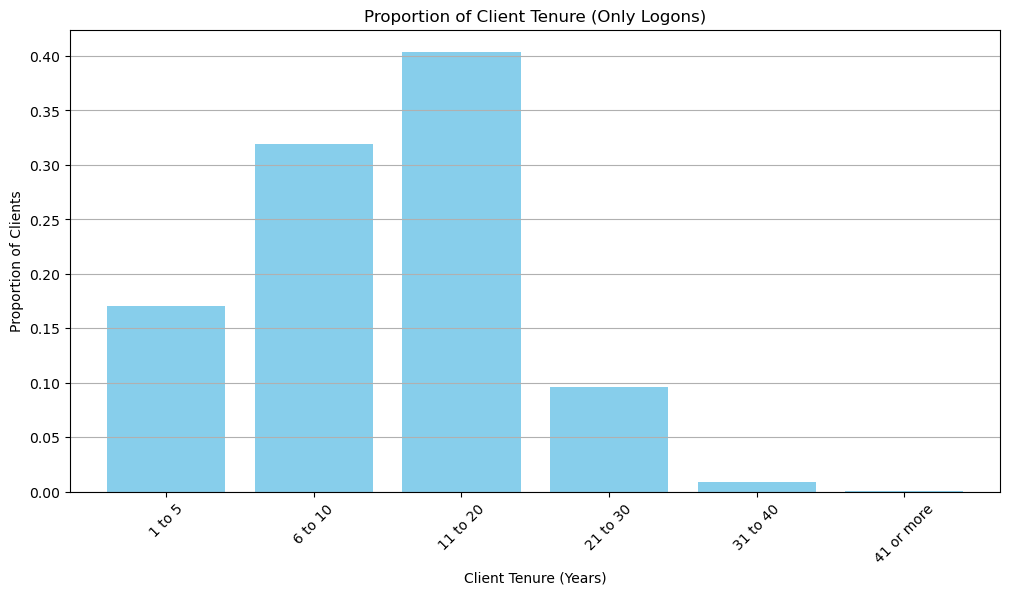

In [88]:
# Filter for clients who made only logons
only_logons = merged_exp_demo[(merged_exp_demo['calls_6_mnth'] == 0) & (merged_exp_demo['logons_6_mnth'] > 0)]

# Define bins and labels for tenure years
bins = [1, 5, 10, 20, 30, 40, merged_exp_demo["clnt_tenure_yr"].max() + 1]  # Added +1 to include the max value
labels = ['1 to 5', '6 to 10', '11 to 20', '21 to 30', '31 to 40', '41 or more']

# Create tenure categories in the DataFrame
only_logons['Clients Tenure (years)'] = pd.cut(only_logons["clnt_tenure_yr"], bins=bins, labels=labels, include_lowest=True)

# Count the number of clients in each tenure bin
tenure_distribution = only_logons['Clients Tenure (years)'].value_counts().sort_index()

# Calculate proportions
tenure_distribution_proportion = tenure_distribution / tenure_distribution.sum()

# Plot bar chart with proportions
ax = tenure_distribution_proportion.plot(kind='bar', figsize=(12, 6), width=0.8, color='skyblue')

plt.xlabel('Client Tenure (Years)')
plt.ylabel('Proportion of Clients')
plt.title('Proportion of Client Tenure (Only Logons)')
plt.grid(axis='y')

# Adjust x-tick labels for clarity
plt.xticks(rotation=45)

plt.show()

## Age distribution for the people only using the website (no calls)

/var/folders/jc/sd79gch55038ry1m8kx4_s440000gn/T/ipykernel_18460/2592800264.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_logons['Clients Age'] = pd.cut(only_logons["clnt_age"], bins=bins, labels=labels, include_lowest=True)
/var/folders/jc/sd79gch55038ry1m8kx4_s440000gn/T/ipykernel_18460/2592800264.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_distribution = only_logons.groupby(['Clients Age', 'Variation']).size().unstack(fill_value=0)


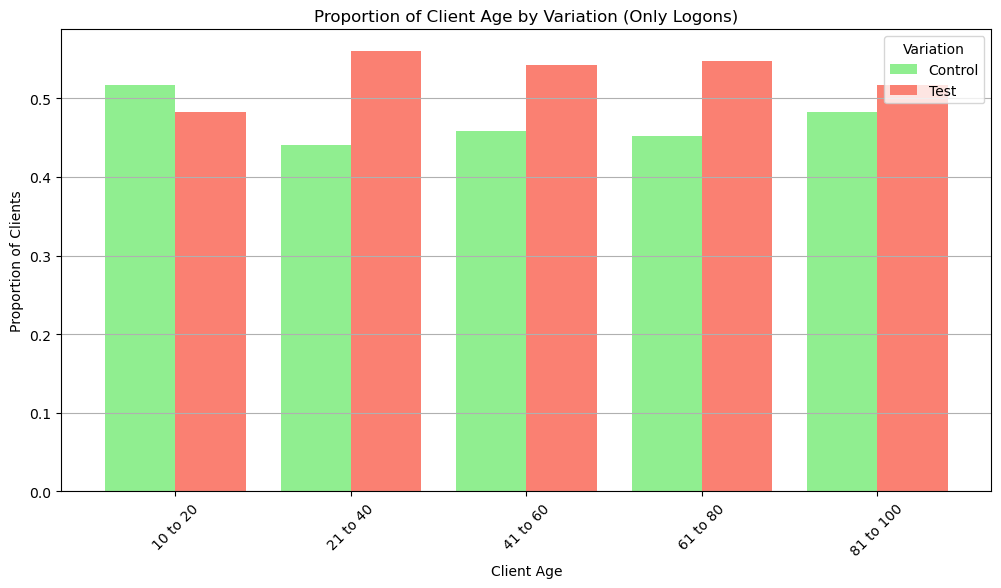

In [89]:
# Filter for clients who made only logons
only_logons = merged_exp_demo[(merged_exp_demo['calls_6_mnth'] == 0) & (merged_exp_demo['logons_6_mnth'] > 0)]

# Define bins and labels for age
bins = [10, 20, 40, 60, 80, 100]
labels = ['10 to 20', '21 to 40', '41 to 60', '61 to 80', '81 to 100']

# Create age categories in the DataFrame
only_logons['Clients Age'] = pd.cut(only_logons["clnt_age"], bins=bins, labels=labels, include_lowest=True)

# Count the number of clients in each age bin for each variation
age_distribution = only_logons.groupby(['Clients Age', 'Variation']).size().unstack(fill_value=0)

# Calculate proportions
age_distribution_proportion = age_distribution.div(age_distribution.sum(axis=1), axis=0)

# Define colors for each variation
colors = {'Test': 'salmon', 'Control': 'lightgreen'}

# Plot grouped bar chart with custom colors
ax = age_distribution_proportion.plot(kind='bar', figsize=(12, 6), width=0.8, color=[colors[col] for col in age_distribution_proportion.columns])

plt.xlabel('Client Age')
plt.ylabel('Proportion of Clients')
plt.title('Proportion of Client Age by Variation (Only Logons)')
plt.legend(title='Variation')
plt.grid(axis='y')

# Adjust x-tick labels for clarity
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=45)

plt.show()

/var/folders/jc/sd79gch55038ry1m8kx4_s440000gn/T/ipykernel_18460/2542701158.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_logons['Clients Age'] = pd.cut(only_logons["clnt_age"], bins=bins, labels=labels, include_lowest=True)


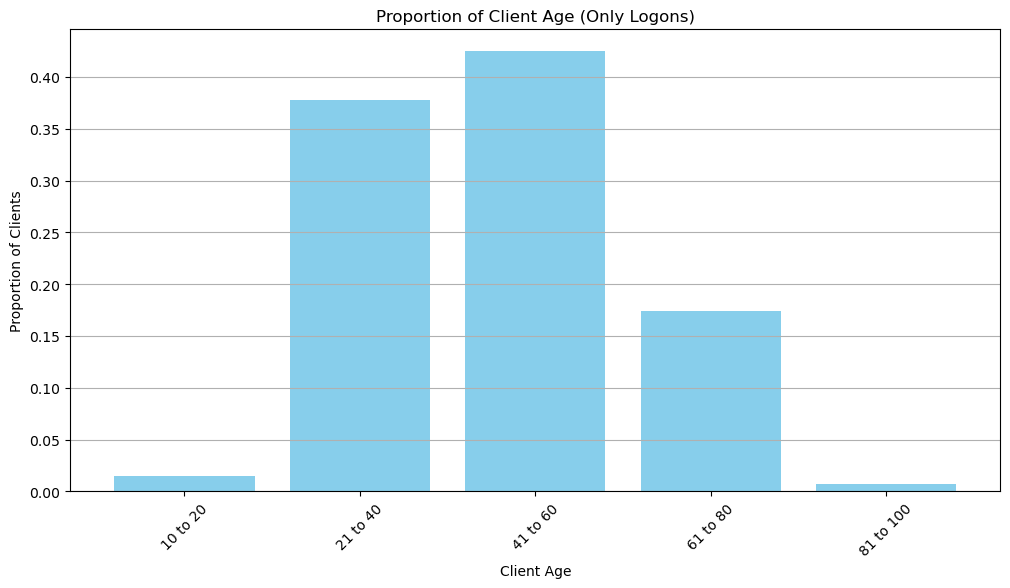

In [90]:
# Filter for clients who made only logons
only_logons = merged_exp_demo[(merged_exp_demo['calls_6_mnth'] == 0) & (merged_exp_demo['logons_6_mnth'] > 0)]

# Define bins and labels for age
bins = [10, 20, 40, 60, 80, 100]
labels = ['10 to 20', '21 to 40', '41 to 60', '61 to 80', '81 to 100']

# Create age categories in the DataFrame
only_logons['Clients Age'] = pd.cut(only_logons["clnt_age"], bins=bins, labels=labels, include_lowest=True)

# Count the number of clients in each age bin
age_distribution = only_logons['Clients Age'].value_counts().sort_index()

# Calculate proportions
age_distribution_proportion = age_distribution / age_distribution.sum()

# Plot bar chart with proportions
ax = age_distribution_proportion.plot(kind='bar', figsize=(12, 6), width=0.8, color='skyblue')

plt.xlabel('Client Age')
plt.ylabel('Proportion of Clients')
plt.title('Proportion of Client Age (Only Logons)')
plt.grid(axis='y')

# Adjust x-tick labels for clarity
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=45)

plt.show()

# Hypothesis Testing

#### Completion Rate

Given the data and KPIs you have explored discussed, one interesting hypothesis to test is related to the completion rate between the Test and Control groups. Since the new design (Test group) had a higher completion rate compared to the old design (Control group), you are required to confirm if this difference is statistically significant.


  
Control:         0.498493

Test:       0.585173

Hypothesis:

H0: CRc >= CRt

H1: CRc < CRt

In [91]:
from scipy import stats

In [92]:
pivot_table

process_step,visit_id,start,step_1,step_2,step_3,confirm,Variation
0,100012776_37918976071_457913,0,0,0,0,2,Test
1,100019538_17884295066_43909,3,4,2,1,1,Test
2,100022086_87870757897_149620,1,1,1,1,1,Test
3,100030127_47967100085_936361,1,0,0,0,0,Control
4,100037962_47432393712_705583,3,1,0,0,0,Control
...,...,...,...,...,...,...,...
69200,999971096_28827267783_236076,1,2,1,1,1,Test
69201,999976049_95772503197_182554,1,1,1,2,1,Test
69202,999984454_18731538378_781808,1,1,1,1,1,Test
69203,999985675_64610694964_443659,1,1,1,1,1,Control


In [93]:
pivot_table['completion'] = pivot_table['confirm'] > 0

In [94]:
# Convert completion to numeric (True = 1, False = 0)
pivot_table['completion_numeric'] = pivot_table['completion'].astype(int)

# Group by Variation
grouped = pivot_table.groupby('Variation')['completion_numeric']

# Extract completion numeric values for Test and Control
test_completions = grouped.get_group('Test')
control_completions = grouped.get_group('Control')

# Perform t-test
t_stat, p_value = stats.ttest_ind(test_completions, control_completions, equal_var=False)  # Use equal_var=False for Welch's t-test

# Output the results
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Interpret the result
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in completion rates between Test and Control.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in completion rates between Test and Control.")

T-statistic: 22.87536556764664, P-value: 2.2495029497662147e-115
Reject the null hypothesis: There is a significant difference in completion rates between Test and Control.


In [95]:
# Calculate completion rate by Variation
completion_rate = pivot_table.groupby('Variation')['completion'].mean()
completion_rate

Variation
Control    0.498086
Test       0.584682
Name: completion, dtype: float64

#### Error Rate

confirm if this difference is statistically significant.

In [171]:
from statsmodels.stats.proportion import proportions_ztest

# Define the number of backward steps and total steps for each variation
count = error_stats['backward_steps'].values
nobs = error_stats['total_steps'].values

# Perform the two-proportion z-test
stat, pval = proportions_ztest(count, nobs)

# Print the test statistic and p-value
print(f"Test Statistic: {stat}")
print(f"P-value: {pval}")

Test Statistic: -24.874538105687666
P-value: 1.4035488084300064e-136
